In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

In [0]:
(Xtrain,Ytrain),(Xtest,Ytest)=mnist.load_data()

In [26]:
print(Xtrain.shape,Ytrain.shape)
print(Xtest.shape,Ytest.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [0]:
def preprocess(X,Y):
  X = np.reshape(X,(-1,28,28,1))
  X = X/255
  Y = to_categorical(Y)
  return (X,Y)

In [0]:
(Xtrain,Ytrain) = preprocess(Xtrain,Ytrain)
(Xtest,Ytest) = preprocess(Xtest,Ytest)

In [29]:
print(Xtrain.shape,Ytrain.shape)
print(Xtest.shape,Ytest.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


In [0]:
def visualise(img):
  plt.imshow(np.reshape(img,(28,28)),cmap='gray')
  plt.style.use('seaborn')
  plt.axis('off')
  plt.show()

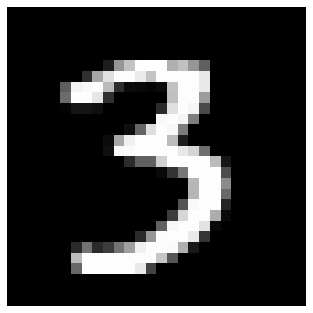

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [32]:
visualise(Xtrain[10000])
print(Ytrain[10000])

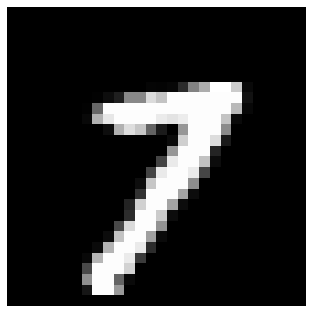

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [33]:
visualise(Xtrain[40000])
print(Ytrain[40000])

In [0]:
## Model Architecture

In [35]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [0]:
## Compiling Model

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
## Training

In [39]:
hist = model.fit(Xtrain,Ytrain,batch_size=128,epochs=20,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 11s 205us/step - loss: 0.2822 - accuracy: 0.9153 - val_loss: 0.0668 - val_accuracy: 0.9808
Epoch 2/20
54000/54000 [==============================] - 5s 91us/step - loss: 0.0667 - accuracy: 0.9795 - val_loss: 0.0690 - val_accuracy: 0.9815
Epoch 3/20
54000/54000 [==============================] - 5s 90us/step - loss: 0.0470 - accuracy: 0.9856 - val_loss: 0.0383 - val_accuracy: 0.9895
Epoch 4/20
54000/54000 [==============================] - 5s 90us/step - loss: 0.0363 - accuracy: 0.9887 - val_loss: 0.0420 - val_accuracy: 0.9882
Epoch 5/20
54000/54000 [==============================] - 5s 91us/step - loss: 0.0286 - accuracy: 0.9910 - val_loss: 0.0376 - val_accuracy: 0.9898
Epoch 6/20
54000/54000 [==============================] - 5s 91us/step - loss: 0.0244 - accuracy: 0.9919 - val_loss: 0.0440 - val_accuracy: 0.9878
Epoch 7/20
54000/54000 [==============================] - 5s 91us/s

In [40]:
model.evaluate(Xtest,Ytest)

10000/10000 [==============================] - 1s 125us/step


[0.03657745556569561, 0.9914000034332275]

In [0]:
def plot_stats():
  plt.axis('off')
  plt.plot(hist.history['loss'],'green',label='loss')
  plt.style.use('dark_background')
  plt.legend()
  plt.show()

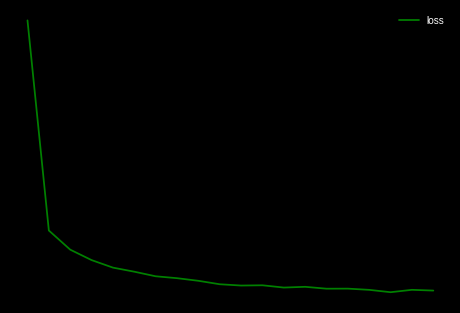

In [60]:
plot_stats()